In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%aimport manual_review_classifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns
from itertools import cycle

from sklearn import metrics
from sklearn.model_selection import train_test_split

from manual_review_classifier.ClassifierPlots import create_reliability_diagram, create_roc_curve

# sns.set_style("white")
# sns.set_context('poster')

In [4]:
training_data = pd.read_pickle('../data/training_data3.pkl')
training_data.sort_index(axis=1, inplace=True)
# remove validation sample
training_data = training_data[~training_data.index.str.contains('H_KA-452198')]

In [5]:
# Get training data as numpy array
X = training_data.drop(['call'], axis=1).astype(float).values
# Get Labels
three_class = training_data.replace('g', 'f')
Y = pd.get_dummies(three_class.call).astype(float).values
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=seed)

In [6]:
threeclass_relu_probs = np.load('../data/deep_learning/threeclass.npy')

In [7]:
threeclass_relu_probs = np.load('../data/deep_learning/threeclass.npy')

In [8]:
logr_probs = np.load('../data/log_reg/threeclass_relu_probs.npy')

In [9]:
forest = np.load('../data/random_forest/1000estimators.npy')

In [10]:
threeclass_relu_probs.shape

(27470, 3)

In [11]:
logr_probs.shape

(27470, 3)

In [12]:
forest.shape

(27470, 3)

In [13]:
Y_train.shape

(27470, 3)

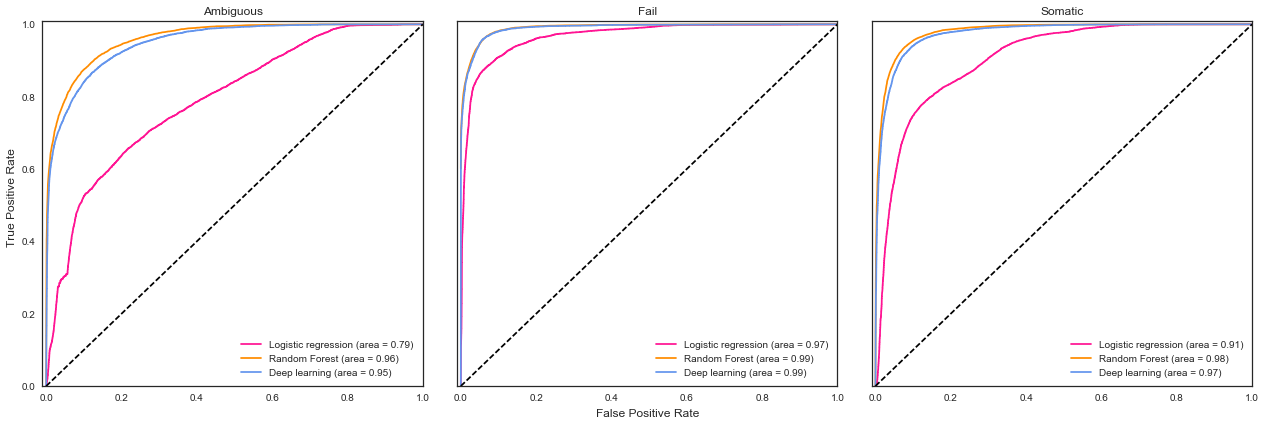

In [14]:
n_classes = Y_train.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
dl_fpr = dict()
dl_tpr = dict()
dl_roc_auc = dict()
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(21, 7))
# fig.suptitle('Receiver Operating Characteristic')
ax_array = axes.flatten()
for i, color in zip(range(n_classes), colors):
    lr_fpr[i], lr_tpr[i], _ = metrics.roc_curve(Y_train[:, i], logr_probs[:, i])
    lr_roc_auc[i] = metrics.auc(lr_fpr[i], lr_tpr[i])
    ax_array[i].plot(lr_fpr[i], lr_tpr[i], color='deeppink', label='Logistic regression'
             ' (area = {0:0.2f})'.format(lr_roc_auc[i]))
    rf_fpr[i], rf_tpr[i], _ = metrics.roc_curve(Y_train[:, i], forest[:, i])
    rf_roc_auc[i] = metrics.auc(rf_fpr[i], rf_tpr[i])
    ax_array[i].plot(rf_fpr[i], rf_tpr[i], color='darkorange', label='Random Forest'
             ' (area = {0:0.2f})'.format(rf_roc_auc[i]))
    dl_fpr[i], dl_tpr[i], _ = metrics.roc_curve(Y_train[:, i], threeclass_relu_probs[:, i])
    dl_roc_auc[i] = metrics.auc(dl_fpr[i], dl_tpr[i])
    ax_array[i].plot(dl_fpr[i], dl_tpr[i], color='cornflowerblue', label='Deep learning'
             ' (area = {0:0.2f})'.format(dl_roc_auc[i]))
    ax_array[i].set_title(class_lookup[i])
    ax_array[i].plot([0, 1], [0, 1], 'k--')
    ax_array[i].legend(loc="lower right")
    ax_array[i].set_xlim([-0.01, 1.0])
    ax_array[i].set_ylim([0.0, 1.01])
# ax.xlabel('False Positive Rate')
# ax.ylabel('True Positive Rate')

fig.text(0.5, 0.07, 'False Positive Rate', ha='center', va='center')
fig.text(0.08, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical')

plt.subplots_adjust(left=0.1, top=.85, wspace=.09)
plt.show()

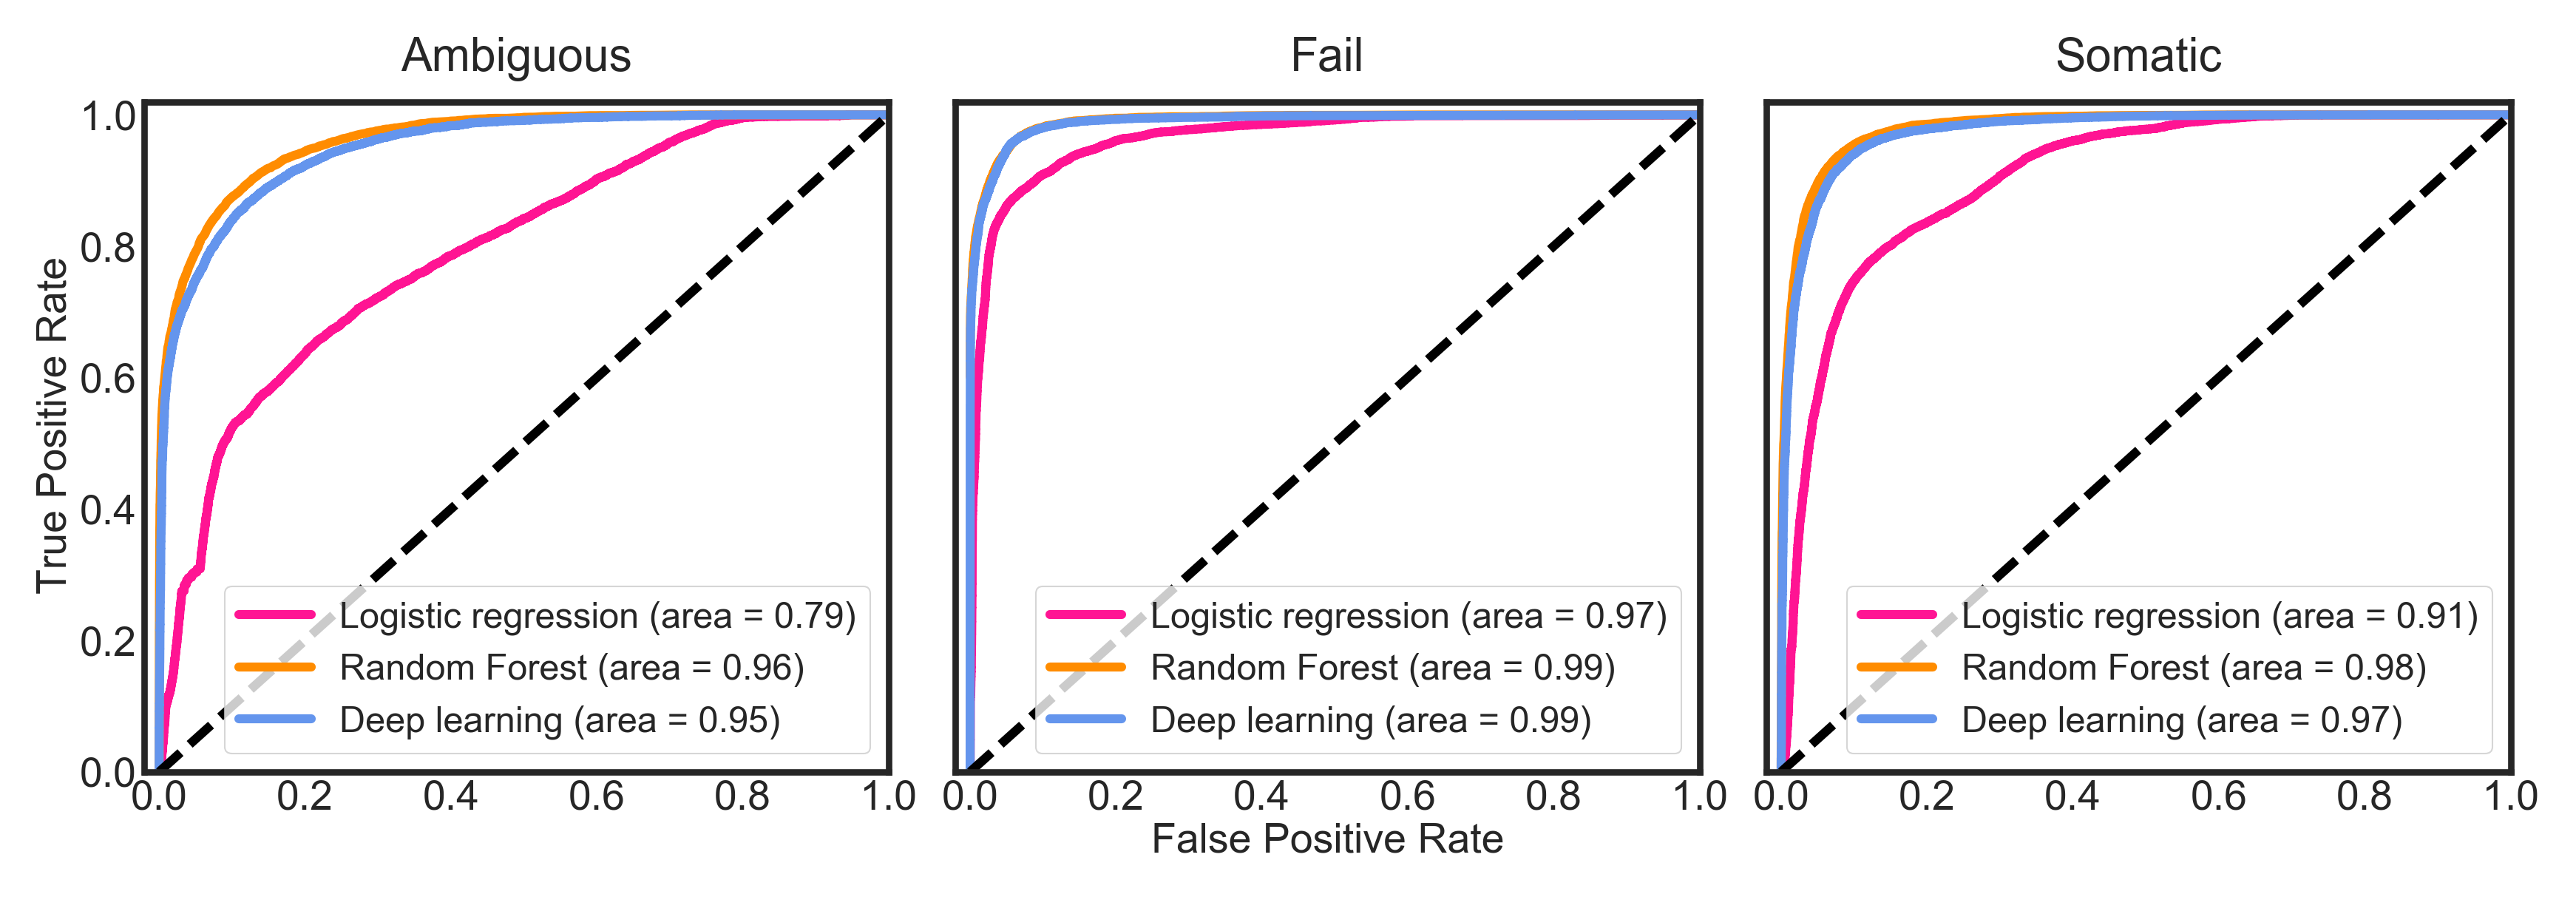

In [15]:
n_classes = Y_train.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
dl_fpr = dict()
dl_tpr = dict()
dl_roc_auc = dict()
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
fig, axes = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(8, 2.5), dpi=500)
# fig.suptitle('Receiver Operating Characteristic')
ax_array = axes.flatten()
for i, color in zip(range(n_classes), colors):
    lr_fpr[i], lr_tpr[i], _ = metrics.roc_curve(Y_train[:, i], logr_probs[:, i])
    lr_roc_auc[i] = metrics.auc(lr_fpr[i], lr_tpr[i])
    ax_array[i].plot(lr_fpr[i], lr_tpr[i], color='deeppink', label='Logistic regression'
             ' (area = {0:0.2f})'.format(lr_roc_auc[i]))
    rf_fpr[i], rf_tpr[i], _ = metrics.roc_curve(Y_train[:, i], forest[:, i])
    rf_roc_auc[i] = metrics.auc(rf_fpr[i], rf_tpr[i])
    ax_array[i].plot(rf_fpr[i], rf_tpr[i], color='darkorange', label='Random Forest'
             ' (area = {0:0.2f})'.format(rf_roc_auc[i]))
    dl_fpr[i], dl_tpr[i], _ = metrics.roc_curve(Y_train[:, i], threeclass_relu_probs[:, i])
    dl_roc_auc[i] = metrics.auc(dl_fpr[i], dl_tpr[i])
    ax_array[i].plot(dl_fpr[i], dl_tpr[i], color='cornflowerblue', label='Deep learning'
             ' (area = {0:0.2f})'.format(dl_roc_auc[i]))
    ax_array[i].set_title(class_lookup[i], fontsize=9)
    ax_array[i].plot([0, 1], [0, 1], 'k--')
    ax_array[i].legend(loc="lower right", fontsize=7, frameon=True)
    ax_array[i].set_xlim([-0.02, 1.0])
    ax_array[i].set_ylim([0.0, 1.02])
    ax_array[i].tick_params(labelsize=8, pad=1.5)
# ax.xlabel('False Positive Rate')
# ax.ylabel('True Positive Rate')

fig.text(0.5, 0.05, 'False Positive Rate', ha='center', va='center', fontsize=8)
fig.text(0.07, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical', fontsize=8)

plt.subplots_adjust(left=0.1, top=.85, wspace=.09)
plt.show()

fig.savefig('../figures/cv_performance.png')
fig.savefig('../figures/cv_performance.pdf')

confidence intervals +-:  [ 0.00159393  0.00533031  0.00497537  0.01044351  0.01550653  0.02165061
  0.02870916  0.04769853  0.05305761  0.00486715]
confidence intervals +-:  [ 0.00059356  0.00330018  0.00590746  0.00820556  0.00934387  0.00997724
  0.00906077  0.00676855  0.00418852  0.00070047]
confidence intervals +-:  [ 0.00060732  0.00599906  0.00873447  0.01067386  0.01089021  0.01222585
  0.01292921  0.01042462  0.00758755  0.00115013]


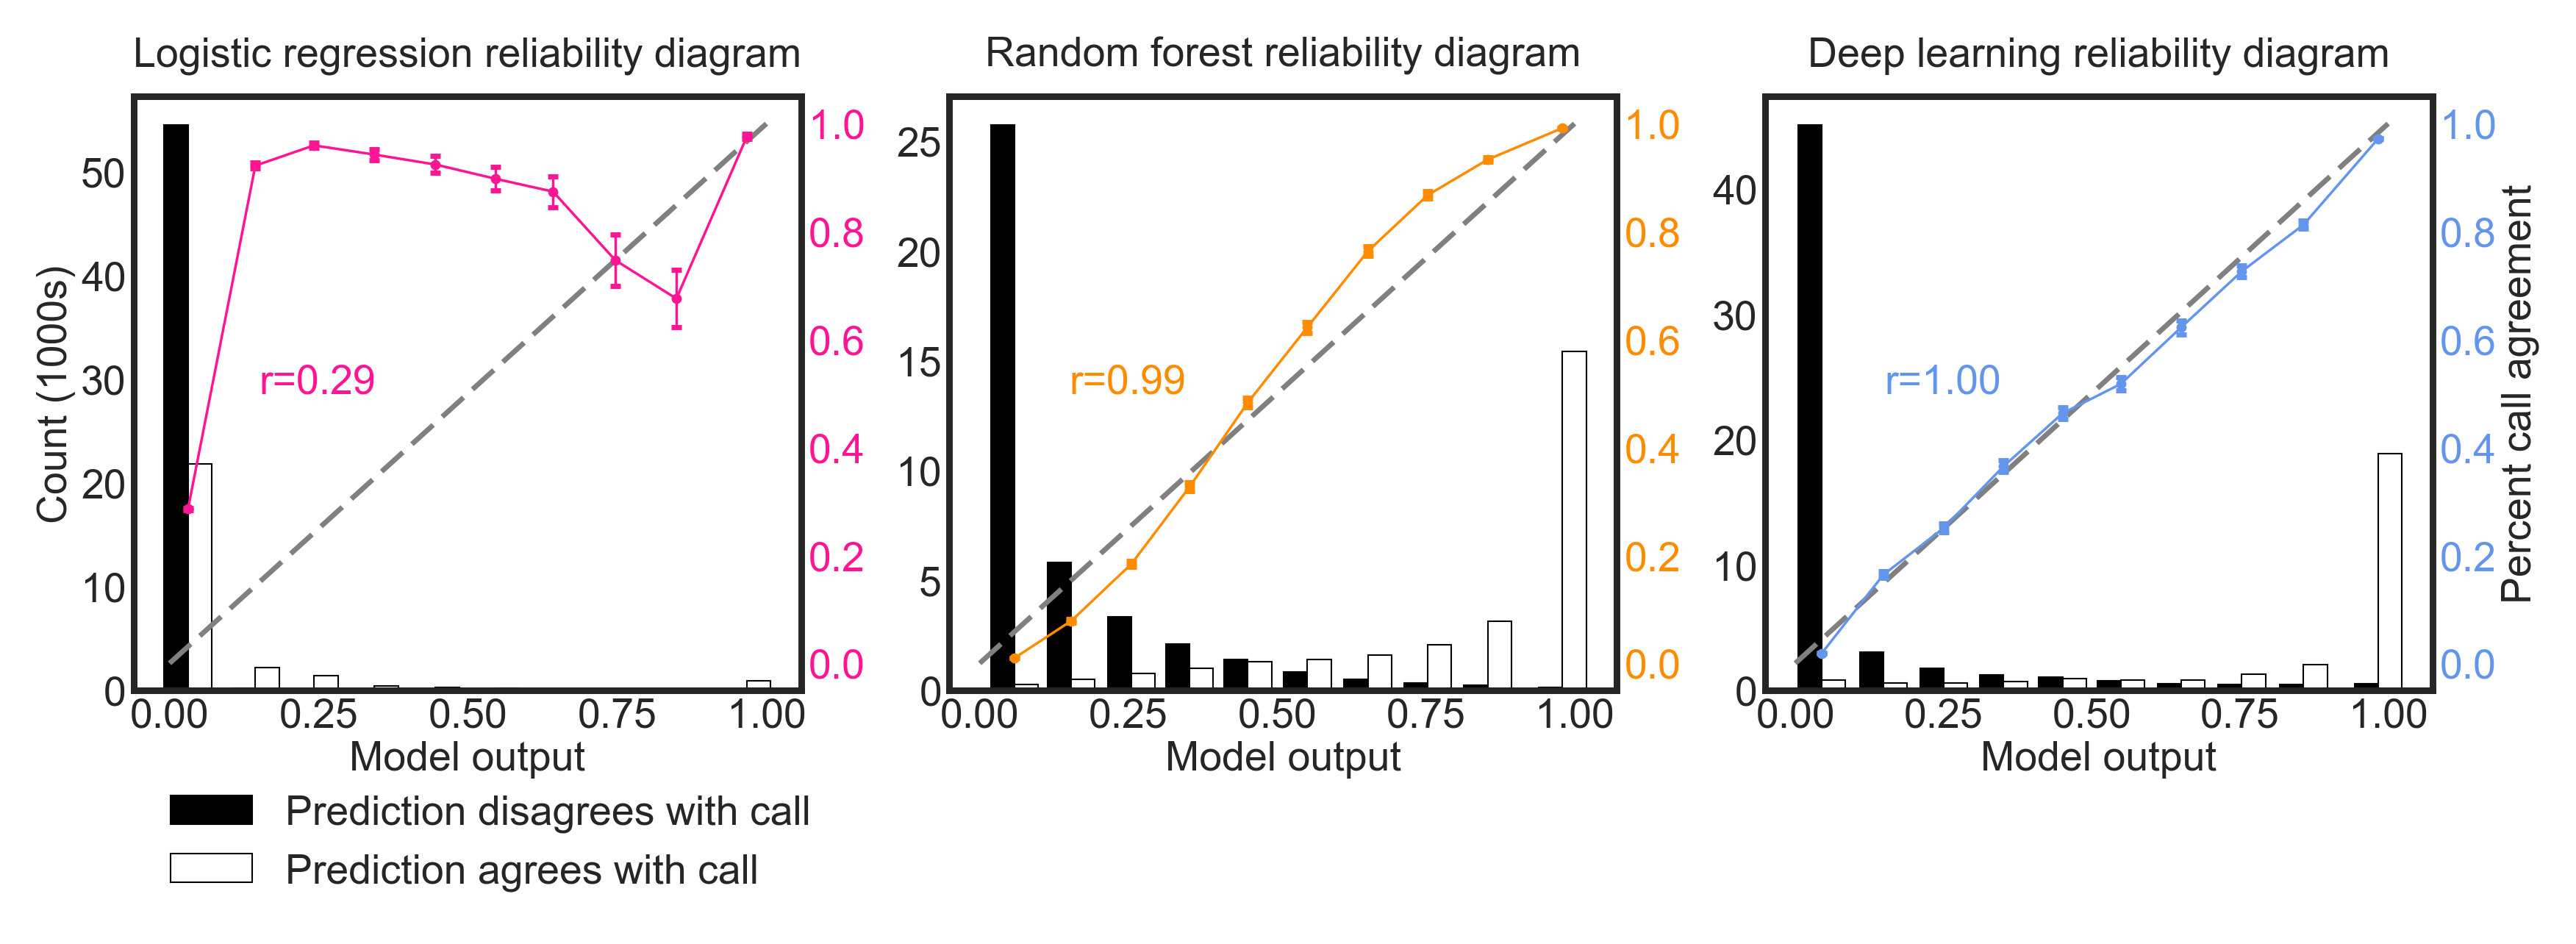

In [16]:

fig, axes = plt.subplots(1, 3, figsize=(7, 2.25), dpi=500)
plt.tight_layout(w_pad=.1)
lgd = create_reliability_diagram(logr_probs, Y_train,['Ambiguous','Fail','Somatic'], 'deeppink', 'Logistic regression reliability diagram', 
                           axes[0], False, True, True)
create_reliability_diagram(forest, Y_train,['Ambiguous','Fail','Somatic'], 'darkorange', 'Random forest reliability diagram', 
                           axes[1], False, False, False)
create_reliability_diagram(threeclass_relu_probs, Y_train,['Ambiguous','Fail','Somatic'], 'cornflowerblue', 'Deep learning reliability diagram', 
                           axes[2], True, False, False)
fig.savefig('../figures/reliability.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('../figures/reliability.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

confidence intervals +-:  [ 0.00120758  0.00778566  0.01101183  0.0137348   0.0153685   0.01968237
  0.02402635  0.02195505  0.01734551  0.00286657]
confidence intervals +-:  [ 0.00072397  0.01569771  0.02194629  0.02786217  0.02168628  0.02144045
  0.026441    0.02327239  0.01976765  0.00163414]
confidence intervals +-:  [ 0.00127629  0.01175893  0.01884547  0.02118012  0.02191788  0.02261458
  0.0187514   0.01366823  0.00927338  0.00176595]


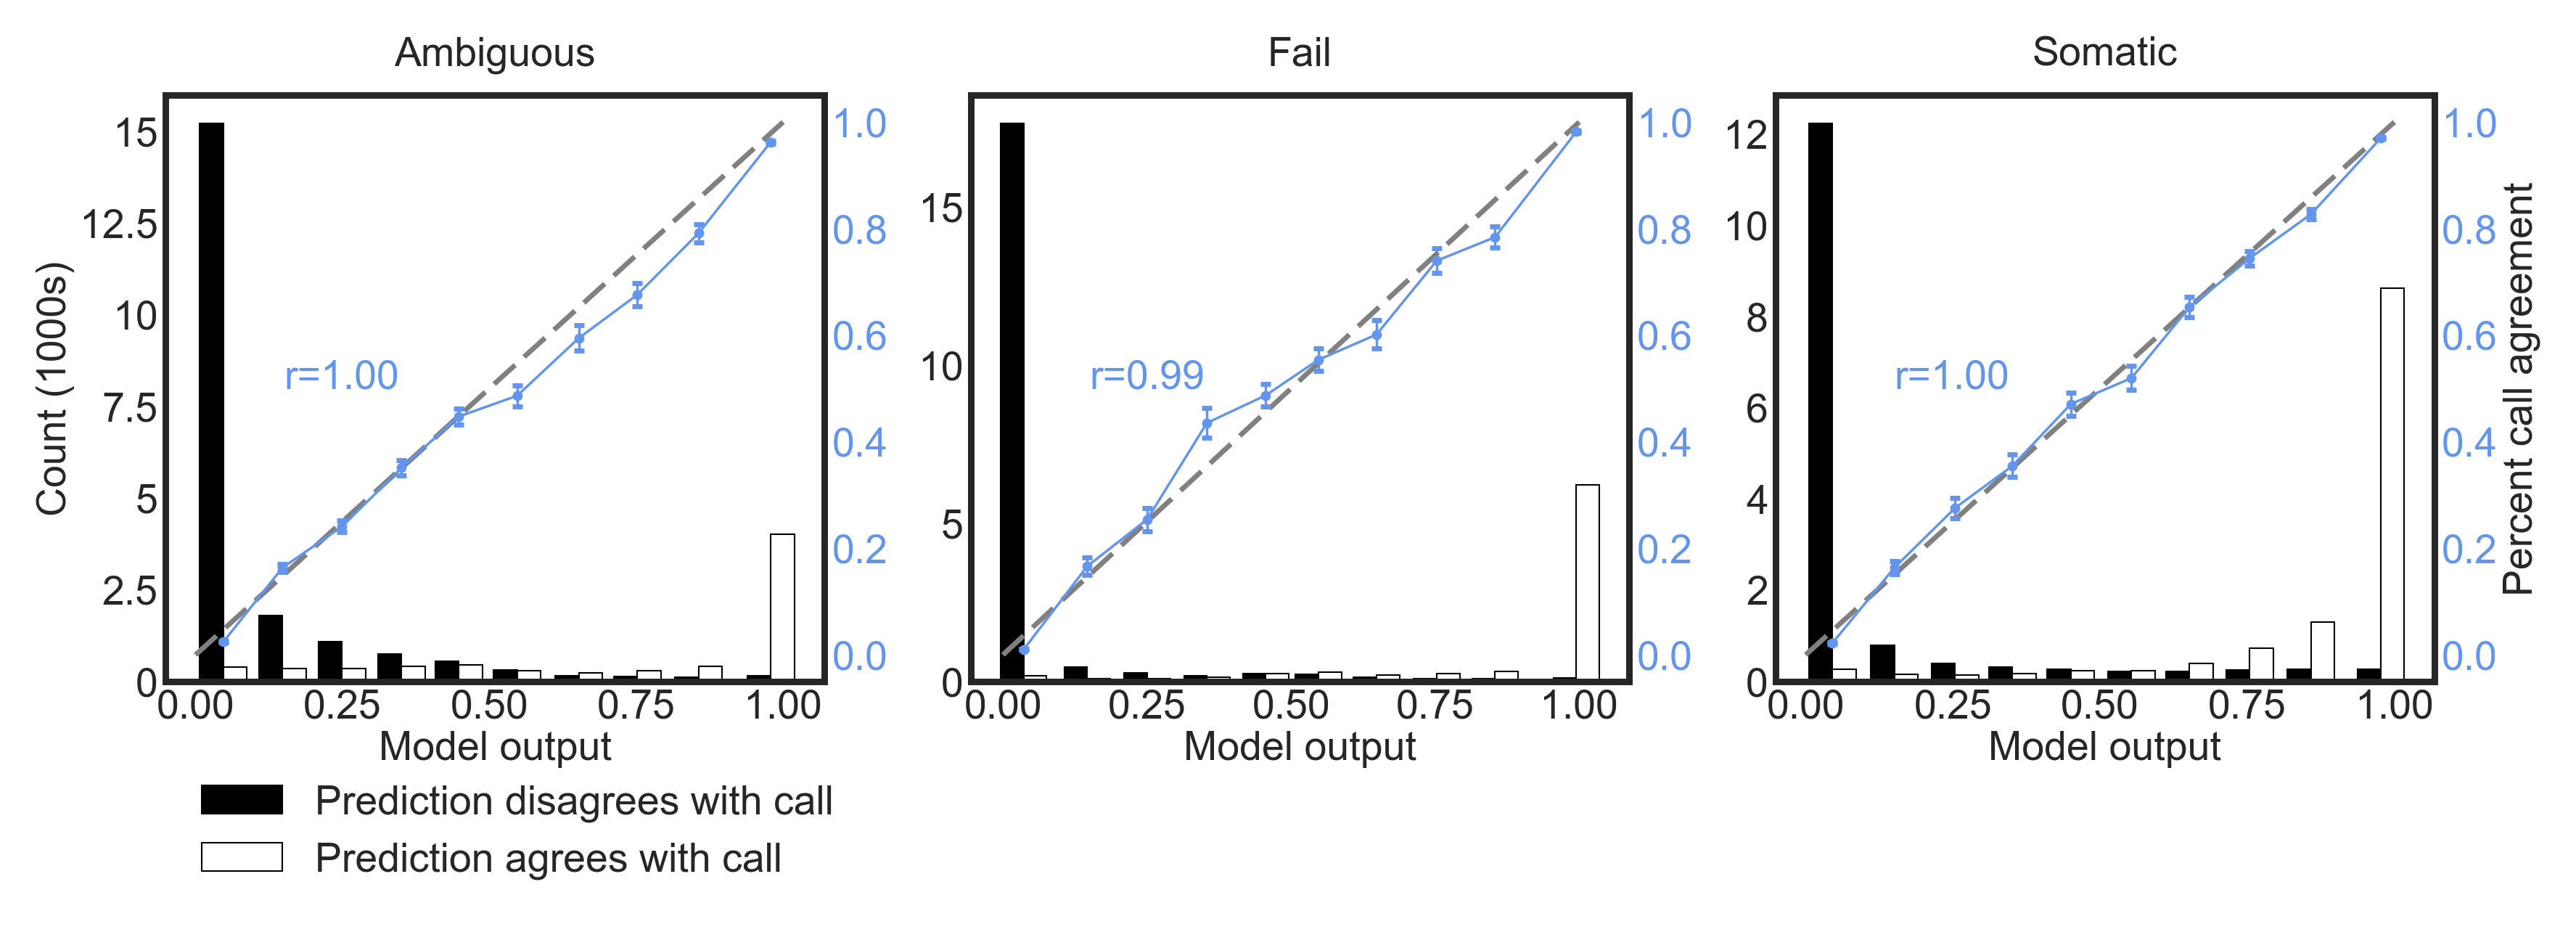

In [17]:

fig, axes = plt.subplots(1, 3, figsize=(7, 2.25), dpi=500)
plt.tight_layout( w_pad=.1)
lgd = create_reliability_diagram(threeclass_relu_probs[:,:1], Y_train[:,:1],['Ambiguous'], 'cornflowerblue', 'Ambiguous',
                           axes[0], False, True, True)
create_reliability_diagram(threeclass_relu_probs[:,1:2], Y_train[:,1:2],['Fail'], 'cornflowerblue', 'Fail',
                           axes[1], False, False, False)
create_reliability_diagram(threeclass_relu_probs[:,2:3], Y_train[:,2:3],['Somatic'], 'cornflowerblue', 'Somatic',
                           axes[2], True, False, False)
fig.savefig('../figures/compare_classes_reliability.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('../figures/compare_classes_reliability.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

confidence intervals +-:  [ 0.00086028  0.00909566  0.01274332  0.01536175  0.01638778  0.01764516
  0.01831183  0.01530992  0.01108368  0.00170606]
confidence intervals +-:  [ 0.0004919   0.00459264  0.0069676   0.0089689   0.00962941  0.01019164
  0.01008673  0.00795631  0.00547085  0.00095537]
confidence intervals +-:  [ 0.00049221  0.00439304  0.0068259   0.00842416  0.00925514  0.00975772
  0.00947851  0.00797738  0.00513363  0.00095949]


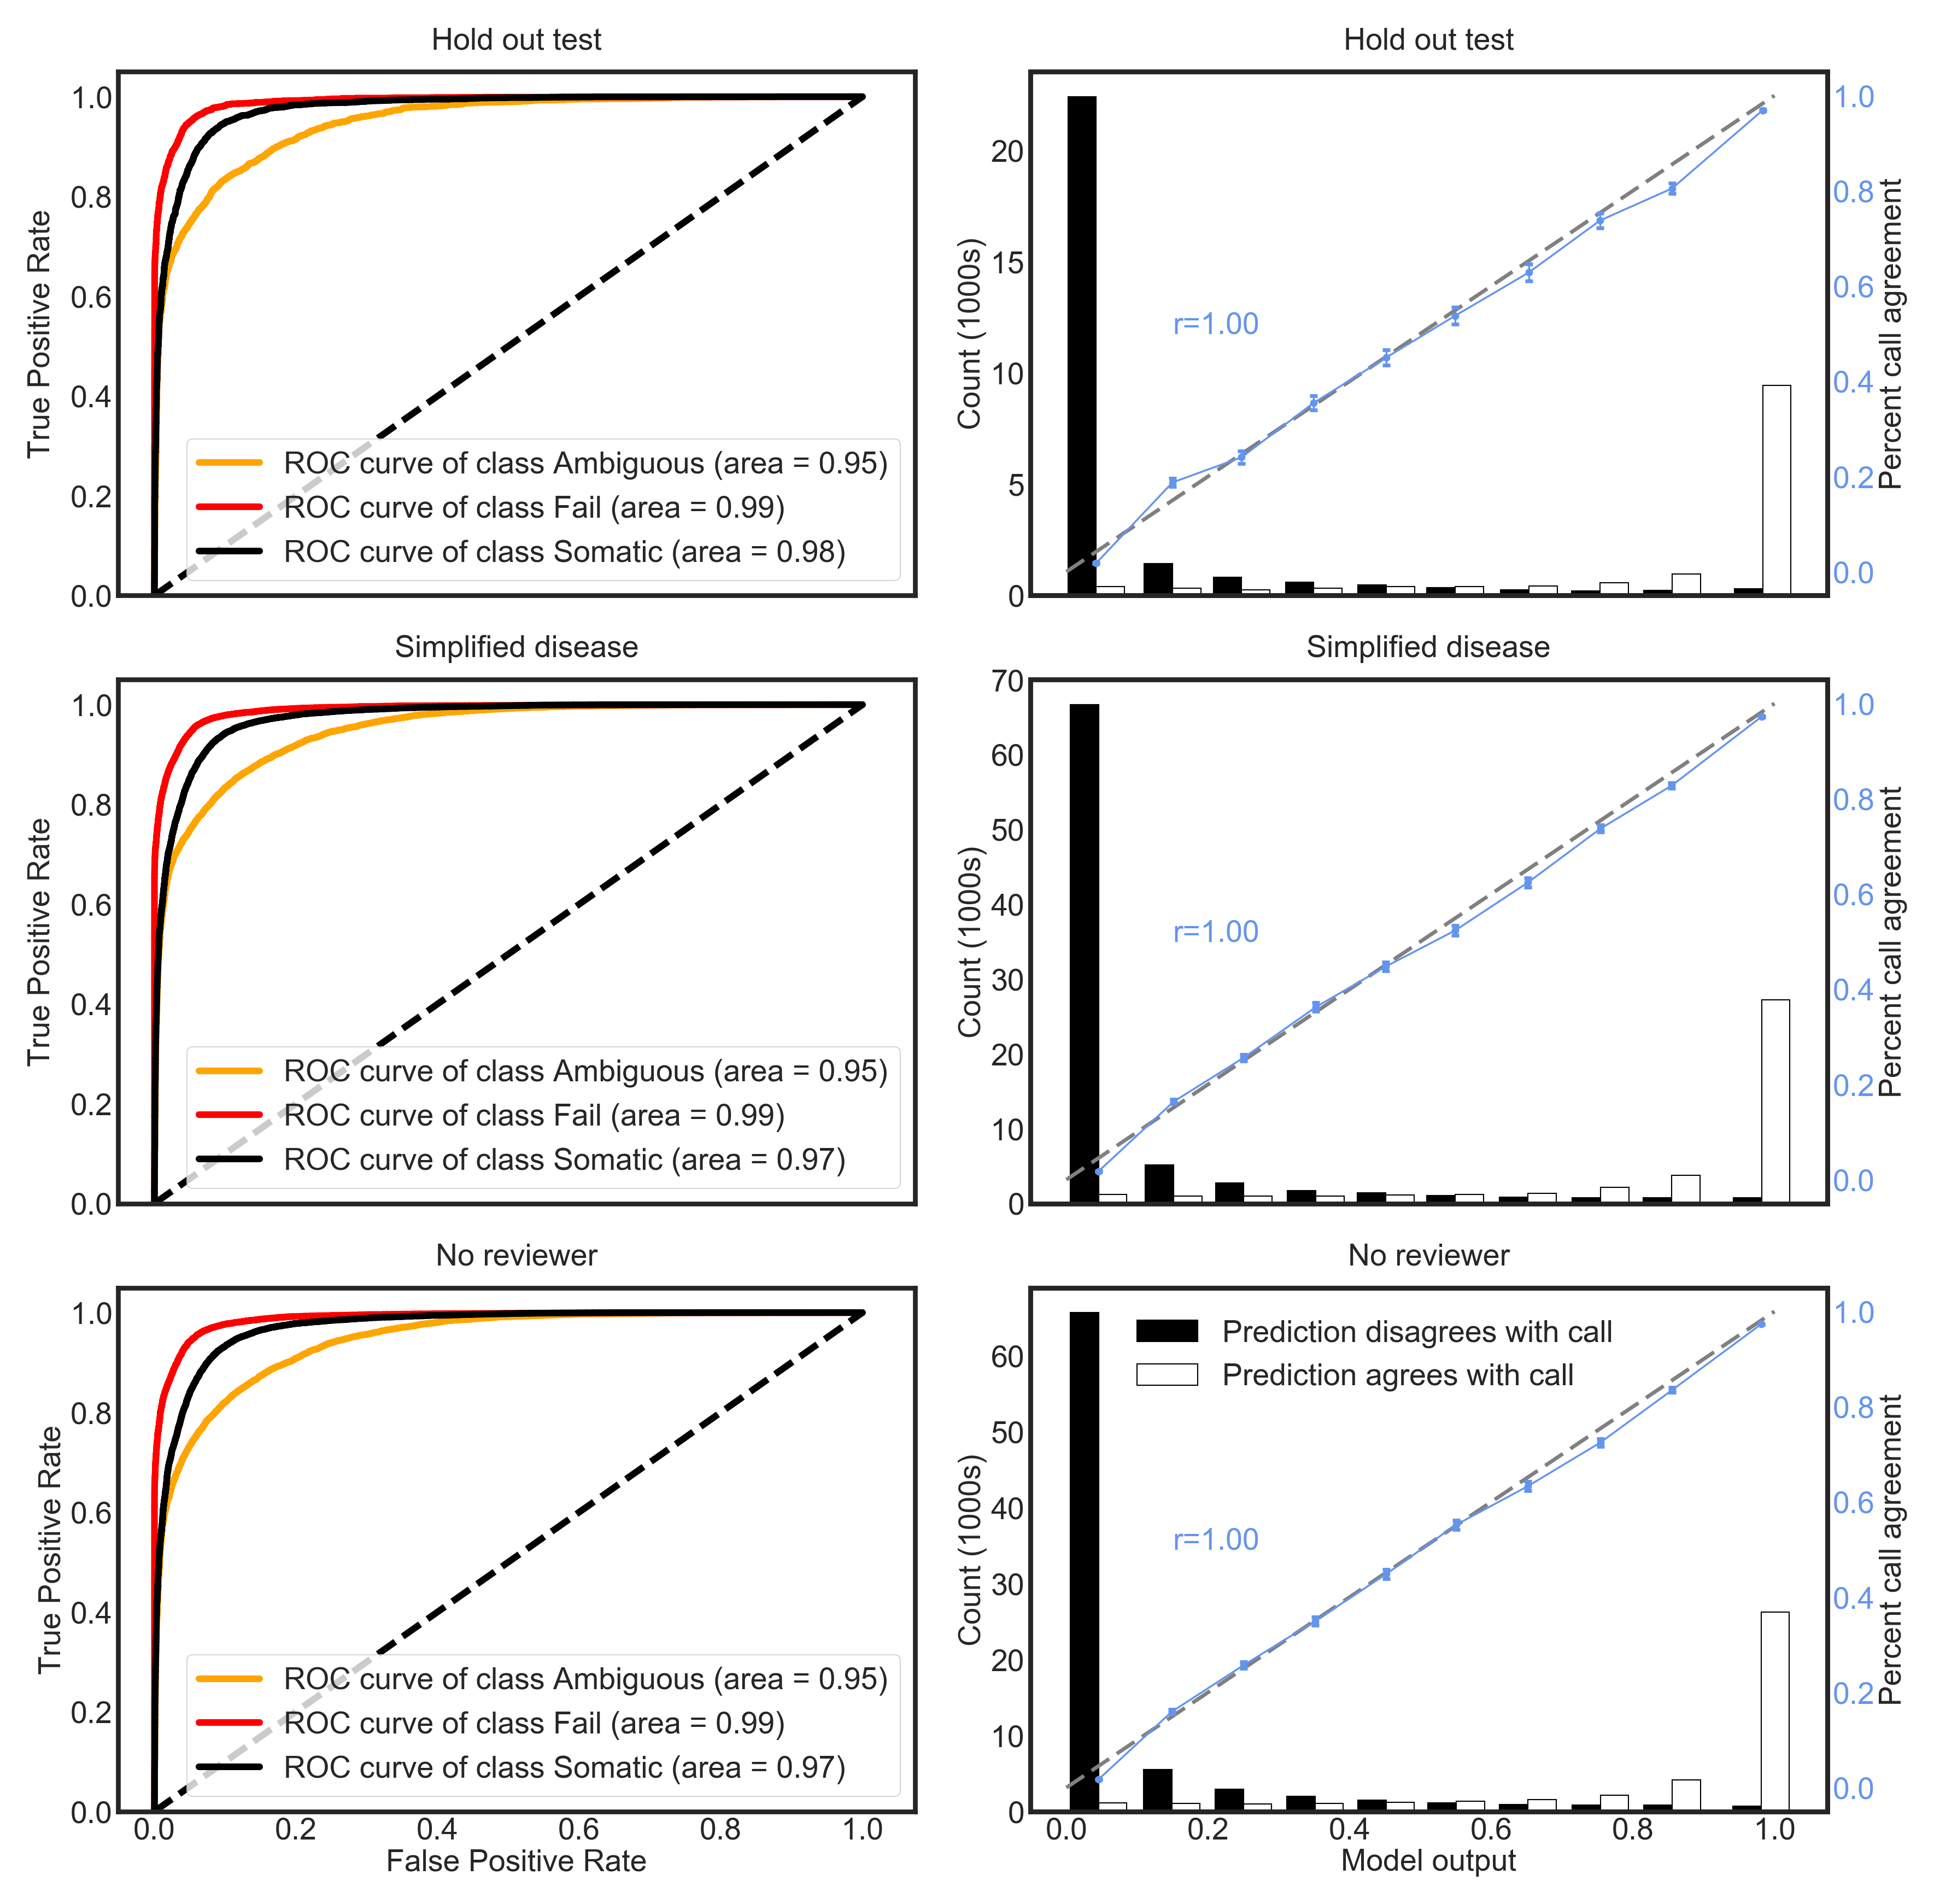

In [19]:
hold_out_test_probs = np.load('../data/deep_learning/hold_out_test_probs.npy')
hold_out_test_y = np.load('../data/deep_learning/hold_out_test_y.npy')
svb_probs = np.load('../data/deep_learning/solid_v_blood.npy')
svb_y = np.load('../data/deep_learning/solid_v_blood_y.npy')
no_reviewer_probs = np.load('../data/deep_learning/noreviewer_probs.npy')

fig, axes = plt.subplots(3, 2, figsize=(7, 7), dpi=500, sharex=True)
plt.tight_layout( w_pad=.2)
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}


create_roc_curve(hold_out_test_y,hold_out_test_probs,class_lookup,'Hold out test',axes[0,0])
axes[0,0].legend(fontsize=8, loc=4,frameon=True)
axes[0,0].tick_params(labelsize=8, pad=1.5)
axes[0,0].set_ylabel('True Positive Rate', fontsize=8)
axes[0,0].set_xlabel('')
axes[0,0].set_title('Hold out test', fontsize=8)
create_reliability_diagram(hold_out_test_probs, hold_out_test_y,['Ambiguous','Fail','Somatic'], 'cornflowerblue', 'Hold out test',
                           axes[0,1], True, True, False)
axes[0,1].set_xlabel('')

create_roc_curve(svb_y,svb_probs,class_lookup,'Simplified disease',axes[1,0])
axes[1,0].legend(fontsize=8, loc=4,frameon=True)
axes[1,0].tick_params(labelsize=8, pad=1.5)
axes[1,0].set_ylabel('True Positive Rate', fontsize=8)
axes[1,0].set_xlabel('')
axes[1,0].set_title('Simplified disease', fontsize=8)
create_reliability_diagram(svb_probs, svb_y,['Ambiguous','Fail','Somatic'], 'cornflowerblue', 'Simplified disease',
                           axes[1,1], True, True, False)
axes[1,1].set_xlabel('')

create_roc_curve(svb_y,no_reviewer_probs,class_lookup,'No reviewer',axes[2,0])
axes[2,0].legend(fontsize=8, loc=4,frameon=True)
axes[2,0].tick_params(labelsize=8, pad=1.5)
axes[2,0].set_ylabel('True Positive Rate', fontsize=8)
axes[2,0].set_xlabel('False Positive Rate', fontsize=8)
axes[2,0].set_title('No reviewer', fontsize=8)
axes[2,0].yaxis.labelpad = 1
axes[2,0].xaxis.labelpad = 1
lgd = create_reliability_diagram(no_reviewer_probs, svb_y,['Ambiguous','Fail','Somatic'], 'cornflowerblue', 'No reviewer',
                                 axes[2,1], True, True, True)
lgd.set_bbox_to_anchor((.1,.75))
fig.savefig('../figures/sup_fig.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig('../figures/sup_fig.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

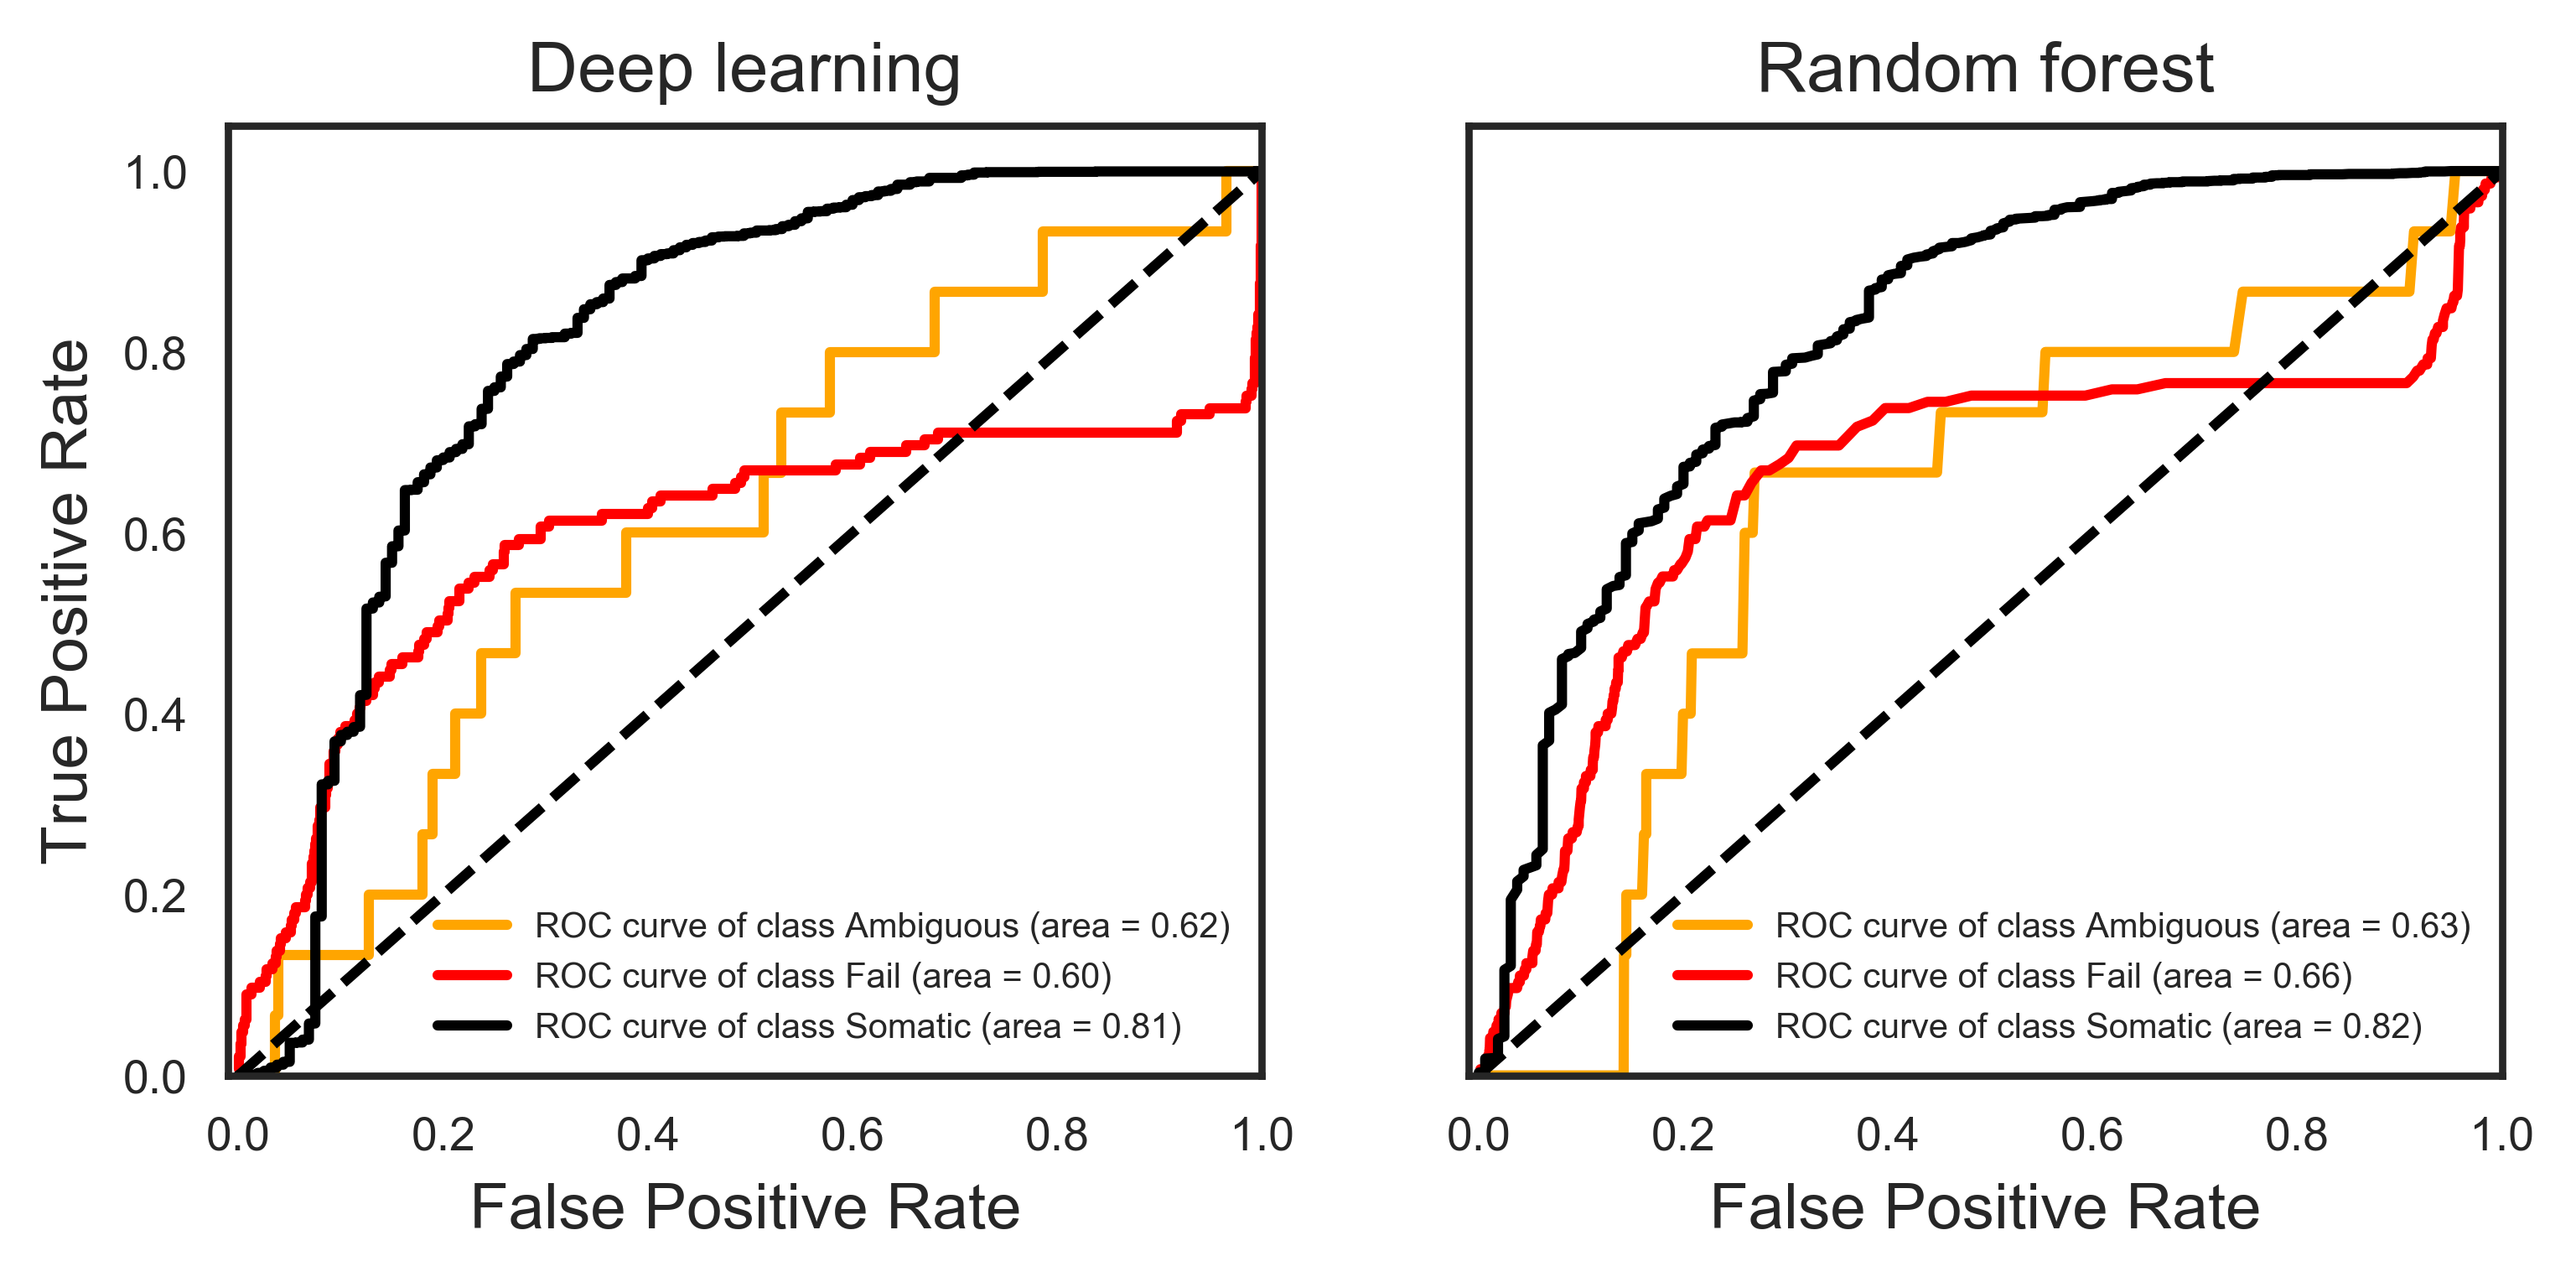

In [21]:
rf_sclc_y = np.load('../data/random_forest/sclc_y.npy')
rf_sclc_probs = np.load('../data/random_forest/sclc_probs.npy')
dl_sclc_y = np.load('../data/deep_learning/sclc_y.npy')
dl_sclc_probs = np.load('../data/deep_learning/sclc_probs.npy')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3),dpi=500, sharey=True)
create_roc_curve(dl_sclc_y, dl_sclc_probs, class_lookup, 'Deep learning', ax1)
create_roc_curve(rf_sclc_y, rf_sclc_probs, class_lookup, 'Random forest', ax2)
ax1.legend(fontsize=6)
ax2.legend(fontsize=6)
ax2.set_ylabel('')
ax1.tick_params(labelsize=8)
ax2.tick_params(labelsize=8)
# fig.suptitle('SCLC independent test set performance',y=1.02)
fig.savefig('../figures/independent_test.png') 
fig.savefig('../figures/independent_test.pdf') 

In [22]:
dl_sclc_auc = pd.read_pickle('../data/deep_learning/sclc_batch_effect_correction.pkl')

In [23]:
rf_sclc_auc = pd.read_pickle('../data/random_forest/sclc_batch_effect_correction.pkl')

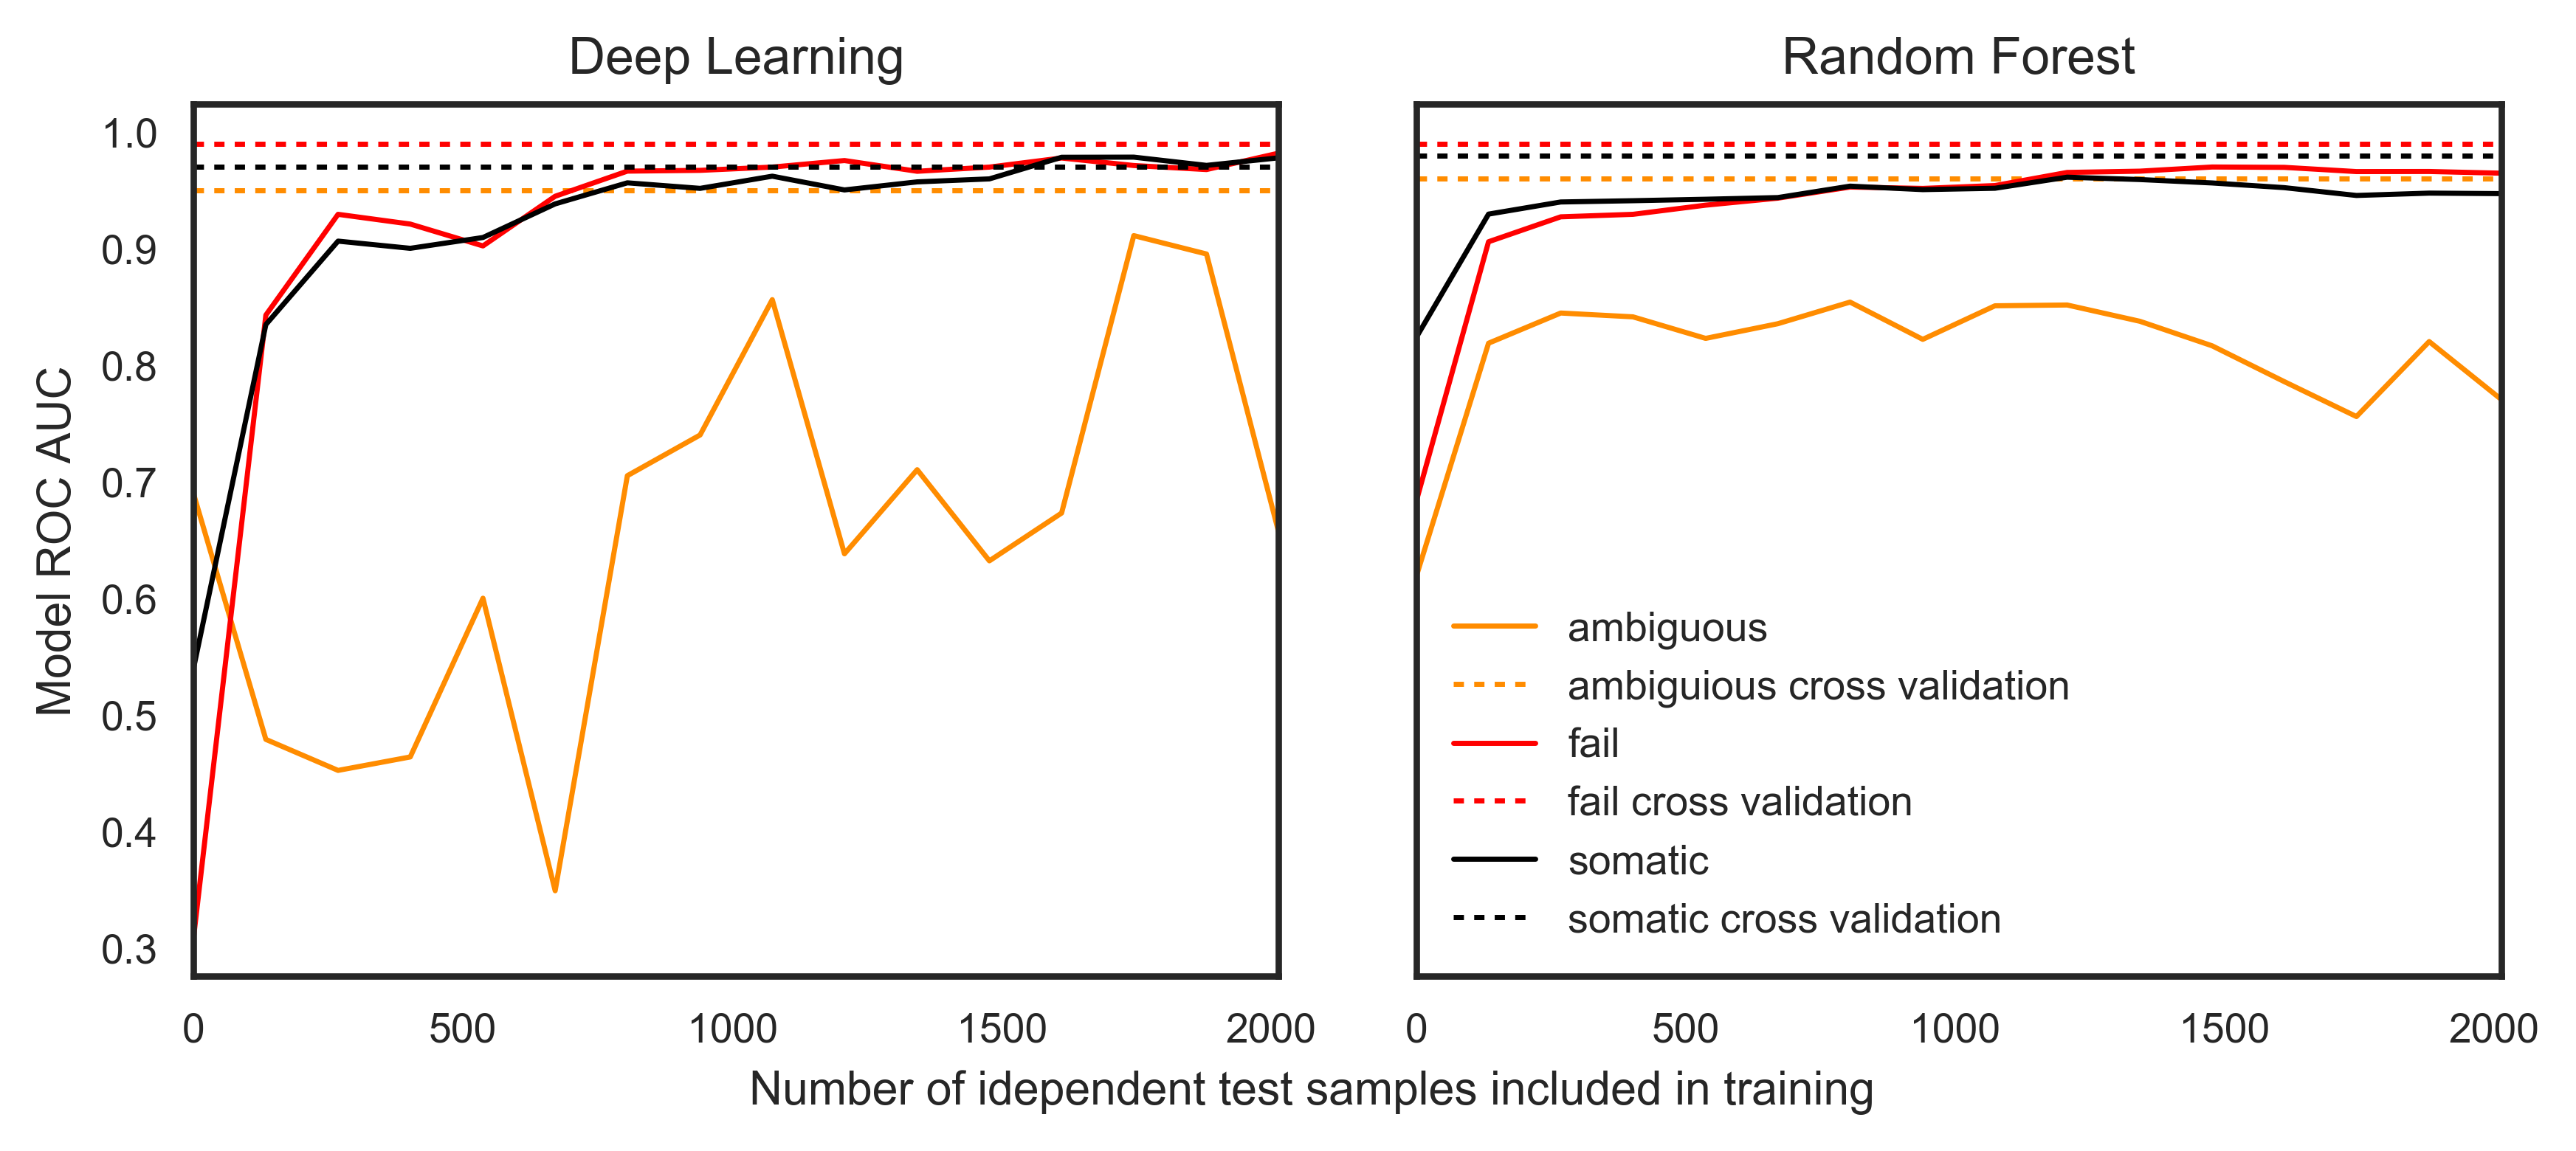

In [24]:

fig, axes = plt.subplots(1,2, figsize=(7,3),dpi=500, sharey=True)
plt.tight_layout()
dl_sclc_auc.plot(x='num. test samples in training', y='ambiguous', ax=axes[0], color='darkorange', linewidth=1)
axes[0].plot([0, 2000], [.95,.95], linestyle='--', dashes=(1, 1),color='darkorange', 
             label='ambiguious cross validation', linewidth=1)
dl_sclc_auc.plot(x='num. test samples in training', y='fail', ax=axes[0], color='red', linewidth=1)
axes[0].plot([0, 2000], [.99,.99], linestyle='--', dashes=(1, 1),color='red', label='fail cross validation', linewidth=1)
dl_sclc_auc.plot(x='num. test samples in training', y='somatic', ax=axes[0], color='black', linewidth=1)
axes[0].plot([0, 2000], [.97,.97], linestyle='--', dashes=(1, 1),color='black', label='somatic cross validation', linewidth=1)
axes[0].set_ylabel('Model ROC AUC',fontsize=9)
axes[0].set_xlabel('')
axes[0].legend_.remove()
axes[0].set_title('Deep Learning', fontsize=10)
axes[0].tick_params(labelsize=8)
rf_sclc_auc.plot(x='num. test samples in training', y='ambiguous', ax=axes[1], color='darkorange', linewidth=1)
axes[1].plot([0, 2000], [.96,.96], linestyle='--', dashes=(1, 1),color='darkorange', 
             label='ambiguious cross validation', linewidth=1)
rf_sclc_auc.plot(x='num. test samples in training', y='fail', ax=axes[1], color='red', linewidth=1)
axes[1].plot([0, 2000], [.99,.99], linestyle='--', dashes=(1, 1),color='red', label='fail cross validation', linewidth=1)
rf_sclc_auc.plot(x='num. test samples in training', y='somatic', ax=axes[1], color='black', linewidth=1)
axes[1].plot([0, 2000], [.98,.98], linestyle='--', dashes=(1, 1),color='black', label='somatic cross validation', linewidth=1)
axes[1].set_ylabel('Model ROC AUC', fontsize=9)
axes[1].set_xlabel('')
axes[1].legend(fontsize=8)
axes[1].set_title('Random Forest', fontsize=10)
axes[1].tick_params(labelsize=8)
fig.text(.5, 0.02, 'Number of idependent test samples included in training', ha='center', fontsize=9)
fig.savefig('../figures/batch_effect_correction.png')
fig.savefig('../figures/batch_effect_correction.pdf')

In [ ]:
pd.read_pickle('../data/full_df.pkl')[['individual_name','chr','start','stop','ref','var']].drop_duplicates().groupby('individual_name').size().to_csv('../data/sites_per_sample', sep='\t')